<a href="https://colab.research.google.com/github/nochwysid/CSE5008-SP/blob/main/MichailSeth_MT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Seth Michail  
202051075003  


In [1]:
import numpy as np
import scipy as sp
from scipy import stats
from scipy import optimize as opt
import matplotlib.pyplot as plt
import math


Question 1-Functions: Root finding  
Suppose f is a continuous function and f(a) < 0 and f(b) > 0 for some known a and b. For simplicity,
assume a < b. Then, there must exist some c such that f(c) = 0.  
(a) Write a function root(f, a, b) that takes a function f and two floats a and b and returns the
root c. Hint: check the sign at the midpoint of the interval.  


In [2]:

def root(f,a,b):
  if(b < a or b == a):
    raise ValueError("b less or equal a, which is not allowed")
  else:
    if (f(a) >= 0 or f(b) <= 0):
      raise ValueError("f(a) >= 0 or f(b) <= 0")
    c = (a + b)/2
    cout = f(c)
    if(cout == 0):
      return c
    elif(cout < 0):
        return root(f,c,b)
    else:
        return root(f,a,c)    
print(root(math.log10, 0.5,2))


1.0


(b) Remove the assumption that a < b, and that f(a) < 0 and f(b) > 0, if your current code relies on
them.  


In [4]:
def root(f,a,b):
  if(b < a):
    return -root(f,b,a)
  else:
    if(b == a):
      raise ValueError("a and b are equal, which is not allowed")
    fa = f(a)
    fb = f(b)
    c = (a + b)/2
    cout = f(c)
    if(cout == 0):
      return c
    elif(cout < 0):
      if(fa < 0):
        return root(f,c,b)
      else:
        return root(f,a,c)
    else:
      if(fa < 0):
        return root(f,a,c)
      else:
        return root(f,c,b)
print(root(math.log10, 0.5,2))


1.0


(c) Add a check that prints ’function evals have same sign’ if f(a) > 0 and f(b) > 0 or if f(a) < 0 and f(b) < 0

In [5]:
def root(f,a,b):
  if(b < a):
    return -root(f,b,a)
  else:
    if(b == a):
      raise ValueError("a and b are equal, which is not allowed")
    fa = f(a)
    fb = f(b)
    if ((fa > 0 and fb > 0) or (fa < 0 and fb < 0)):
      raise ValueError("function evals have same sign")
    c = (a + b)/2
    cout = f(c)
    if(cout == 0):
      return c
    elif(cout < 0):
      if(fa < 0):
        return root(f,c,b)
      else:
        return root(f,a,c)
    else:
      if(fa < 0):
        return root(f,a,c)
      else:
        return root(f,c,b)
print(root(math.log10, 0.5,2))


1.0


Question 2-Numpy: Nearest neighbor  
Write a function that takes a value $z$ and an array $A$ and finds the element in $A$ that is closest to $z$. The function should return the closest value, not index.  
Hint: Use the built-in functionality of Numpy rather than writing code to find this value manually. In
particular, use brackets and argmin.

In [6]:
z = 27
A = 2*np.random.randint(0,50,(5,5))

def nearest(mat,val):
  temp_m = abs(mat - val)
  arg = np.argmin(temp_m)
  c = arg % (temp_m.shape[1])
  r = (int)((arg - c) / temp_m.shape[1])
  print('r, c:', r, c)
  print('Nearest number:', A[r,c])
  
  neighbor = A[r,c]
  return neighbor, r, c
n, r, c = nearest(A,z)
print('Number nearest {} is {}, at ({},{})'.format(z,n,r,c))

r, c: 2 3
Nearest number: 28
Number nearest 27 is 28, at (2,3)


Question 3-Classes: Binary search tree  
In this exercise, we will implement a binary search tree.  
(a) Define a class Node, and write the constructor, which takes one argument, value, and initializes
the left and right children to None.  
 

In [7]:
class Node:
  def __init__(self, value):
    self.left = None
    self.right = None
    self.value = value

n = Node(4)
print(n.value, n.left)

4 None


(b) Write a function to print the tree.  


In [8]:
pass
def __print__(self):
  if self.left is not None:
    self.left.__print__()
  if self.right is not None:
    self.right.__print__()
  print("dunder print - ",self.value)

(c) Write a function that inserts a new value in the tree at the right location.  


In [9]:
pass
def __insert__(self, x):
  if x < self.value:
    if self.left is not None:
      self.left.__insert__(x)
    else:
      self.left = Node(x)
  elif x > self.value:
    if self.right is not None:
      self.right.__insert__(x)
    else:
      self.right = Node(x)

(d) Write a function that looks up a value in the tree.  


In [10]:
pass
def __bsearch__(self,x):
  if x < self.value:
    if self.left is not None:
      self.left.__bsearch__(x)
    else:
      print("Not found")
  elif x > self.value:
    if self.right is not None:
      self.right.__bsearch__(x)
    else:
      print("Not found")
  else:
    print("{} found in tree".format(self.value))

(e) Write a function that removes a value from the tree. 

In [11]:
pass
def __delete__(self,x):
  if x < self.value:
    if self.left is not None:
      self.left.__delete__(x)
    else:
      print("Not found")
  elif x > self.value:
    if self.right is not None:
      self.right.__delete__(x)
    else:
      print("Not found")
  else:
    if self.right is not None:
      self.value = self.right.value
      self.right = None
    elif self.left is not None:
      self.value = self.left.value
      self.left = None
    else:
      print("Deleting self")
      self = None
    print("deleted {} from tree".format(x))

Putting it all together

In [25]:
class Node:
  def __init__(self, value):
    self.left = None
    self.right = None
    self.value = value
  
  def __print__(self):
    if self.left is not None:
      self.left.__print__()
    if self.right is not None:
      self.right.__print__()
    print(self.value)

  def __insert__(self, x):
    if x < self.value:
      if self.left is not None:
        self.left.__insert__(x)
      else:
        self.left = Node(x)
    elif x > self.value:
      if self.right is not None:
        self.right.__insert__(x)
      else:
        self.right = Node(x)

  def __bsearch__(self,x):
    if x < self.value:
      if self.left is not None:
        self.left.__bsearch__(x)
      else:
        print("Not found")
    elif x > self.value:
      if self.right is not None:
        self.right.__bsearch__(x)
      else:
        print("Not found")
    else:
      print("{} found in tree".format(self.value))

  def __delete__(self,x):
    if x < self.value:
      if self.left is not None:
        self.left.__delete__(x)
      else:
        print("Not found")
    elif x > self.value:
      if self.right is not None:
        self.right.__delete__(x)
      else:
        print("Not found")
    else:
      if self.right is not None:
        self.value = self.right.value
        self.right = None
      elif self.left is not None:
        self.value = self.left.value
        self.left = None
      else:
        print("Deleting self")
        self = None
      print("deleted {} from tree".format(x))

n = Node(7)
n.__insert__(4)
n.__insert__(6)
n.__insert__(2)
n.__insert__(1)
n.__insert__(5)
n.__insert__(3)
n.__delete__(4)
n.__bsearch__(6)
n.__delete__(4)
n.__print__()

deleted 4 from tree
6 found in tree
Not found
1
3
2
6
7


Question 4-Scipy: Optimization  
Find the maximum of the function  
$f(x) = sin^2(x − 2)e^{−x^2}$

In [14]:
def f(x):
  xexp = np.exp(-x**2)  #exponential part
  xsin = np.sin(x-2)**2 #trigonometric part
  return xexp*xsin
fmax = sp.optimize.fmin(lambda x: -f(x), 0)
print(fmax)

Optimization terminated successfully.
         Current function value: -0.911685
         Iterations: 20
         Function evaluations: 40
[0.21625]


Question 5-Scipy: Pairwise distances  
Let $X$ be a matrix with $n$ rows and $m$ columns. How can you compute the pairwise distances between
every two rows?  
As an example application, consider n cities, and we are given their coordinates in two columns. Now
we want a nice table that tells us for each two cities, how far they are apart.  
Again, make sure you make use of Scipy’s functionality instead of writing your own routine.

In [23]:
n,m = 7,2
pairX = np.random.randint(0,10,size=n*m).reshape(n,m)
print(pairX,'\n')
#pairwise distances built-in from Scipy
distances = sp.spatial.distance.pdist(pairX)
print('pairwise distances\n',distances)

[[0 4]
 [5 9]
 [5 8]
 [9 9]
 [1 1]
 [1 1]
 [3 0]] 

pairwise distances
 [ 7.07106781  6.40312424 10.29563014  3.16227766  3.16227766  5.
  1.          4.          8.94427191  8.94427191  9.21954446  4.12310563
  8.06225775  8.06225775  8.24621125 11.3137085  11.3137085  10.81665383
  0.          2.23606798  2.23606798]


Question 6-Matplotlib: Data  
Create a data matrix $X$ with 20 observations of 10 variables. Generate a vector $b$ with parameters Then
generate the response vector $y = Xb+z$ where $z$ is a vector with standard normally distributed variables.
Now (by only using $y$ and $X$), find an estimator for $b$, by solving
$$\hat{b} = \text{arg} \min_{b} \|Xb − y\|^2$$
Plot the true parameters $b$ and estimated parameters $\hat{b}$. See Figure 1 for an example plot.

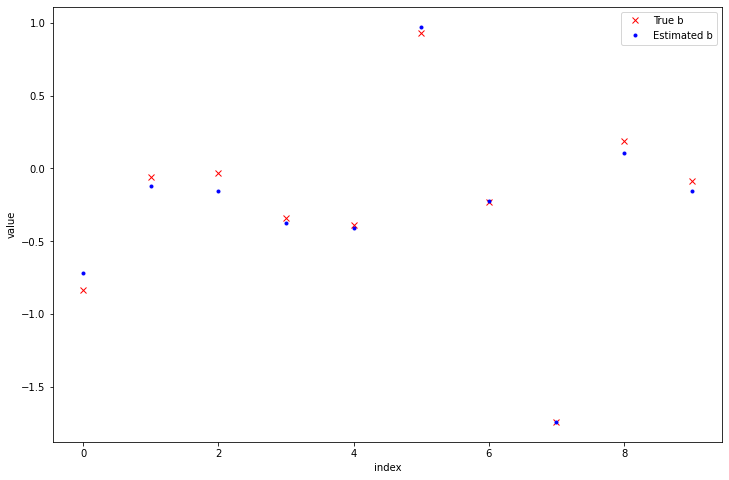

In [19]:
def estimate(X, y):
  xb = np.linalg.inv(np.dot(X.T, X))
  xy = np.dot(X.T, y) 
  return np.dot(xb, xy)  

idxaxis = np.arange(0.0, 10.0, 1.0)
X = np.random.randint(-10,10,size=20*10).reshape(20,10)
b = np.random.uniform(-2.0, 2.0, 10)
z = np.random.normal(0.0,1.0,size=20)
y = np.dot(X, b) + z
b_hat = estimate(X, y)

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(idxaxis, b, 'rx', label='True b')
plt.plot(idxaxis, b_hat, 'b.', label='Estimated b')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()

plt.show()